<a href="https://colab.research.google.com/github/InadiaI/FakeNews/blob/main/Copie_de_FakeNews_ELKHOURY_BIANNIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Subject :** Create an algorithm for classifying news are "fake" or "real".






_______________________________________________________

[1] Datasets from kaggle.com

https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset

https://www.kaggle.com/c/fake-news/data 

https://www.kaggle.com/hassanamin/textdb3

https://www.kaggle.com/snapcrack/all-the-news (only "real")

https://www.kaggle.com/mrisdal/fake-news (only fake)




1- You need datasets containing news with a label "fake" or "real". You can use datasets from kaggle.com [1] or any other dataset you can find (github, google colab, ...).


In [14]:
#We start by importing all libraries
import keras
!pip install kaggle
import json
import zipfile
import os
import pandas as pd
import nltk
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# **Etape 1: Import et Formattage de nos données**
On importe la dataset de kaggle :

In [11]:
#kaggle token
os.environ['KAGGLE_USERNAME'] = "nadiaelkhoury"
os.environ['KAGGLE_KEY'] = "0dda7b45f140e015af3441566c4be78d"

#mkdir for a clean working environment
if not os.path.exists("/fakeNews/"):
    os.makedirs("/fakeNews")
os.chdir('/fakeNews')

#dl
!kaggle datasets download -d clmentbisaillon/fake-and-real-news-dataset

zip = zipfile.ZipFile("fake-and-real-news-dataset.zip",'r')
zip.extractall()

for file in os.listdir():
  print(file)



fake-and-real-news-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Fake.csv
fake-and-real-news-dataset.zip
True.csv


On importe les différentes datasets True et Fake, on ajoute une colonne de labels pour pouvoir différencier les fake news des vrais ( 1 : true, à: fake) On va ensuite split le texte pour séparer chaque élément puis filtrer la ponctuation pour ne garder les mots.Enfin on concatène les deux bases de données en une seule qu'on appellera dataset.

In [26]:
#import puis traitement et filtrage des données on va ensuite ajouter une colonne additonnelle pour reconnaitre les fake news
FILENAMES = {'True.csv':1, 'Fake.csv':0}
DATA_MAX = 1000 #max data number taken in each dataframes

dfs = []
for filename, label in FILENAMES.items():
  df = pd.read_csv(filename)
  df["y"] = label
  dfs.append(df[:DATA_MAX])


#concatenation
dataset = pd.concat(dfs, ignore_index=True)


formating text:
* tokenizing
* only alpha
* lowercase
* removal of useless auxiliaries

In [35]:
# def tokenizer_func(string):
#   words = np.asarray(word_tokenize(string))
#   return np.core.defchararray.lower(words[np.where(np.core.defchararray.isalpha(words))])

# def clean_stopword(array):
#   return array[np.where(np.isin(array, np.asarray(stopwords.words('english')), invert=True))]

# dataset.text = dataset.text.apply(tokenizer_func)

# #nettoyage des mots inutiles
# dataset.text = dataset.text.apply(clean_stopword)

# dataset

On va à présent céer notre bag of words

In [40]:
# create the transform
vectorizer = CountVectorizer(''.join(dataset.text),
                             encoding='utf-8',
                             lowercase=True,
                             analyzer='word',
                             stop_words='english',
                             max_df=1.0,
                             min_df=1,
                             max_features=None)

# tokenize and build vocab
vectorizer.fit(dataset.text)
# summarize
print("Bag of words :")
print(vectorizer.vocabulary_)
# encode document
vector = vectorizer.transform([dataset.text[0]])
# summarize encoded vector
print("vector shape : ", vector.shape)

import numpy as np

vector = vectorizer.transform(dataset.text)
print("vector shape : ")
print(vector.shape)
inputshape = (vector.shape[1],)
print("vector size : ")
print(vector.size)

Bag of words :
{'washington': 26244, 'reuters': 20690, 'head': 11630, 'conservative': 6057, 'republican': 20471, 'faction': 9528, 'congress': 6009, 'voted': 26076, 'month': 16211, 'huge': 12137, 'expansion': 9344, 'national': 16579, 'debt': 7021, 'pay': 18001, 'tax': 24065, 'cuts': 6777, 'called': 4561, 'fiscal': 9951, 'sunday': 23638, 'urged': 25649, 'budget': 4344, 'restraint': 20611, '2018': 903, 'keeping': 13841, 'sharp': 22021, 'pivot': 18450, 'way': 26282, 'republicans': 20472, 'representative': 20450, 'mark': 15347, 'meadows': 15571, 'speaking': 22825, 'cbs': 4865, 'face': 9510, 'nation': 16578, 'drew': 8267, 'hard': 11514, 'line': 14714, 'federal': 9735, 'spending': 22880, 'lawmakers': 14375, 'bracing': 4055, 'battle': 3319, 'january': 13341, 'return': 20677, 'holidays': 11949, 'wednesday': 26342, 'begin': 3419, 'trying': 25014, 'pass': 17904, 'fight': 9844, 'likely': 14680, 'linked': 14727, 'issues': 13221, 'immigration': 12418, 'policy': 18619, 'november': 17034, 'congression

## **Analysis of the dataset:** 
Comme on peut le remarquer notre dataset est formée des colonnes suivantes : un index, un titre, un texte, un sujet, une date, et on a rajouté une colonne y qui indique si la nouvelle est vrai ou fausse.
On l'a obtenue en mélangeant 2 datasets de vraies et fausses nouvelles.


In [16]:
train_dataset, other_datasets = train_test_split(dataset, train_size=0.4)
valid_dataset, test_dataset = train_test_split(other_datasets, train_size=0.5)

print(f"dataset shape : train:{train_dataset.shape}, valid:{valid_dataset.shape}, test{test_dataset.shape}")
print("\n Train dataset :")
train_dataset


dataset shape : train:(800, 5), valid:(600, 5), test(600, 5)

 Train dataset :


,title,text,subject,date,y
918,Congress should weigh U.S. regulation of gun '...,"[washington, reuters, congress, consider, legi...",politicsNews,"November 1, 2017",1
677,Trump asked Putin if allegations of Russian me...,"[moscow, reuters, donald, trump, directly, ask...",politicsNews,"November 12, 2017",1
190,"Prayer, principle guide women voters in Roy Mo...","[gadsden, reuters, senate, race, rocked, alleg...",politicsNews,"December 12, 2017",1
1375,Trump Fans Are Crying In Their Milk After The...,"[trump, made, bad, decision, ardent, followers...",News,"September 15, 2017",0
1158,Watch GOP Senator Almost Knock Over American ...,"[capitol, hill, press, conference, supposed, j...",News,"October 31, 2017",0
...,...,...,...,...,...
271,Funding bill clears hurdle in House,"[washington, reuters, legislation, extend, fun...",politicsNews,"December 7, 2017",1
272,Exclusive: U.S. regulators offer Congress oliv...,"[new, york, regulators, said, open, revising, ...",politicsNews,"December 7, 2017",1
167,Minnesota lieutenant governor to replace Frank...,"[reuters, minnesota, democratic, lieutenant, g...",politicsNews,"December 13, 2017",1
1451,Russian TV Host Just Admitted Russia Elected ...,"[united, states, special, investigator, robert...",News,"September 2, 2017",0


Epoch 1/20
2/2 [==============================] - 0s 208ms/step - loss: 0.4305 - accuracy: 0.9530 - val_loss: 2.7480 - val_accuracy: 0.0000e+00
Epoch 2/20
2/2 [==============================] - 0s 129ms/step - loss: 0.0697 - accuracy: 1.0000 - val_loss: 3.4987 - val_accuracy: 0.0000e+00
Epoch 3/20
2/2 [==============================] - 0s 132ms/step - loss: 0.0376 - accuracy: 1.0000 - val_loss: 3.9529 - val_accuracy: 0.0000e+00
Epoch 4/20
2/2 [==============================] - 0s 122ms/step - loss: 0.0256 - accuracy: 1.0000 - val_loss: 4.3035 - val_accuracy: 0.0000e+00
Epoch 5/20
2/2 [==============================] - 0s 130ms/step - loss: 0.0189 - accuracy: 1.0000 - val_loss: 4.5957 - val_accuracy: 0.0000e+00
Epoch 6/20
2/2 [==============================] - 0s 116ms/step - loss: 0.0147 - accuracy: 1.0000 - val_loss: 4.8523 - val_accuracy: 0.0000e+00
Epoch 7/20
2/2 [==============================] - 0s 122ms/step - loss: 0.0118 - accuracy: 1.0000 - val_loss: 5.0829 - val_accuracy: 0.0

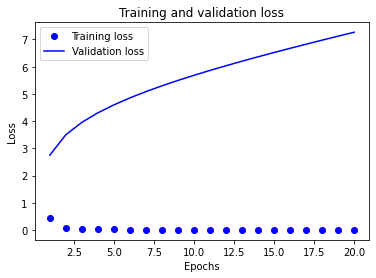

In [41]:
from keras import models
from keras import layers
import tensorflow as tf
import numpy as np

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=inputshape))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


# array=vector.toarray()
# x_val_array = array[:1000]
# y_val = np.array(dataset.y[:1000])
# partial_x_train_array = array[1000:]
# partial_y_train_array = np.array(dataset.y[1000:])

history = model.fit(partial_x_train_array,
                    partial_y_train_array,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val_array, y_val))

#plot the results :
history_dict = history.history

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()





**Then you will process the data. Try to represent the data with Bag of Word
Apply a standard (not deep learning) machine learning algorithm.
Compute and analyze the performance.**

try to apply the same algorithm to a different dataset,
use more complex representation of the data (Word2Vect, or anything else),
try to improve or change the ML algorithm (for exemple try to use deepLearning),
In each case, compare the performances obtained.


It is not expected that you try all of this, you are free to chose the representation of data that you want and the ML that you want. But be sure to understand what you are doing as you will need to present it.
